# Rozcvička

Napiste program pro pokladnu ktery umozni vlozit castku k zaplaceni a bankovku (castku), kterou zakaznik plati. Na vystupu program vypise seznam a pocet vracenych bankovek a minci.

Priklad: 
* Vstup: Zaplatit 16 Kc, placeno 100 Kc
* Vystup: Vratit 84, rozpis: 1x50, 1x20, 1x10, 2x2


In [1]:
bankovkymince = (1000, 500, 100, 50, 20, 10, 5, 2, 1)

castka = float(input("Zadej castku k placeni"))
zaplaceno = float(input("Vlozeny obnos"))
vratit = zaplaceno-castka
if (vratit < 0):
    print("Obnos nedostacuje")
else:
    print("vratit ", vratit)
    rozpis = {}
    for bm in bankovkymince:
        if (vratit/bm >= 1):
            rozpis[bm]=int(vratit/bm)
            vratit=vratit%bm
    print (rozpis)
    print("Kontrola", vratit==0)


vratit  59.0
{50: 1, 5: 1, 2: 2}
Kontrola True


# Priklad na cteni souboru
* v danem souboru najdete pocet radek, slov a znaku
* v danem souboru najdete 5 nejcasteji se vyskytujicich slov
* vytisnete 3 slovo na 6 readce v danem souboru
* nacist a zobrazit vysledek mereni, prolozit linearni caru MNC?

# priklad na funkce
* napiste funkci, ktera spocita reseni kvadraticke rovnice, vyneste do grafu pro kontrolu
* pridejte funkci, ktera najde vrchol (max/min)
* napiste funkci, ktera pro parabolu najde hodnoty x (pro zadane y)
* napiste funkci, ktera pro dana x spocte hodnotu dane funkce 



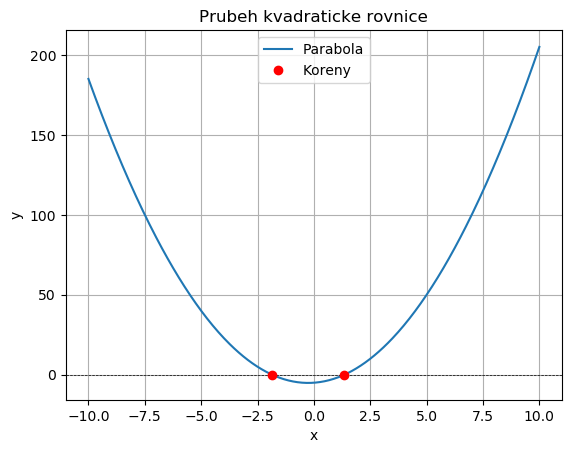

In [7]:
# vyres danou kvadratickou rovnici ax^2 + bx + c = 0
# vynes parabolu a koreny do grafu
import matplotlib.pyplot as plt
import numpy as np

#definuj funkci pro reseni kvadraticke rovnice
def kvadraticka_rovnice(a, b, c):
    D = b**2 - 4*a*c
    if D < 0:
        return ()
    elif D == 0:
        x1 = -b / (2*a)
        return (x1,)
    else:
        x1 = (-b + D**0.5) / (2*a)
        x2 = (-b - D**0.5) / (2*a)
        return (x1, x2)



a = float(input("Zadej a: "))
b = float(input("Zadej b: "))
c = float(input("Zadej c: "))

koreny = kvadraticka_rovnice(a, b, c)


# plot the parabola and roots
x = np.linspace(-10, 10, 400)
y = a*x**2 + b*x + c
plt.plot(x, y, label='Parabola')
plt.axhline(0, color='black', lw=0.5, ls='--')
if len(koreny):
    plt.plot(koreny, [0]*len(koreny), 'ro', label='Koreny')
plt.title('Prubeh kvadraticke rovnice')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Rovnice ma lokalni minimum v bode (-0.25, -5.125)


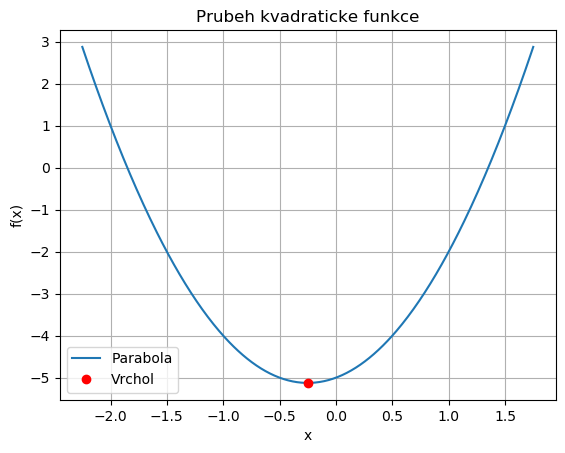

In [8]:
# pro danou kvadratickou fukci najdi souradnice vrcholu a urci, zda se jedna o minimum nebo maximum
# vykresli pro kontrolu graf funkce

def vrchol_kvadraticke_funkce(a, b, c):
    xv = -b / (2*a)
    yv = a*xv**2 + b*xv + c
    return (xv, yv)

a = float(input("Zadej a: "))
b = float(input("Zadej b: "))
c = float(input("Zadej c: "))
# souradnice vrcholu
xv, yv = vrchol_kvadraticke_funkce(a, b, c)
if a > 0:
    print(f"Rovnice ma lokalni minimum v bode ({xv}, {yv})")
else:
    print(f"Rovnice ma lokalni maximum v bode ({xv}, {yv})")
# vykresleni grafu
x = np.linspace(xv-2, xv+2, 400)
y = a*x**2 + b*x + c
plt.plot(x, y, label='Parabola')
plt.plot(xv, yv, 'ro', label='Vrchol')
plt.title('Prubeh kvadraticke funkce')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


Optimized Parameters: [2.52760033 0.95428257 1.        ]


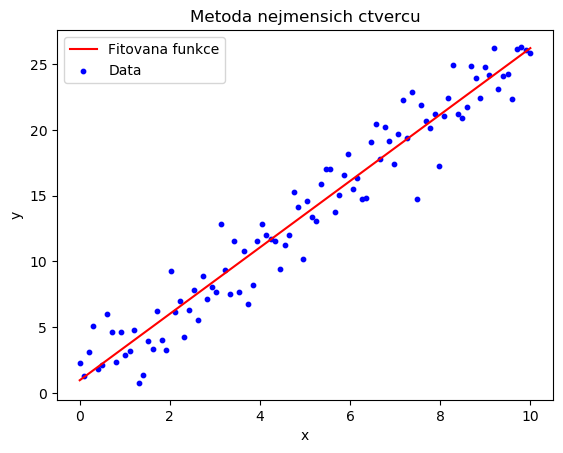

In [26]:
# Priklad - Reseni minimalizacniho problemu metodou nejmensich ctvercu (prolozeni linearni funkce daty)

#Example: Fitting a Nonlinear Function
import numpy as np
from scipy.optimize import least_squares

# Hledana, neznama funke
def model(x, params):
    a, b, c = params
    #return a * np.exp(-b * x) + c
    return a * x + b 

# Definice rezidua (chyby mezi pozorovanymi a predpovedenymi hodnotami)
def residuals(params, x, y):
    return y - model(x, params)

# Generovani syntetickych dat s sumem
np.random.seed(42)
x_data = np.linspace(0, 10, 100)
true_params = [2.5, 1.3, 0.5]
y_data = model(x_data, true_params) + 2.0 * np.random.normal(size=len(x_data))

# Pocatecni odhad parametru
pocatecniOdhad = [1.0, 1.0, 1.0]

# Provedeni optimalizace metodou nejmensich ctvercu
result = least_squares(residuals, pocatecniOdhad, args=(x_data, y_data))

# Extrakce optimalizovanych parametru
optimized_params = result.x

# Vystup vysledku
print("Optimized Parameters:", optimized_params)

# Vykresleni dat a prolozene funkce
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, label="Data", color="blue", s=10)
plt.plot(x_data, model(x_data, optimized_params), label="Fitovana funkce", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Metoda nejmensich ctvercu")
plt.show()



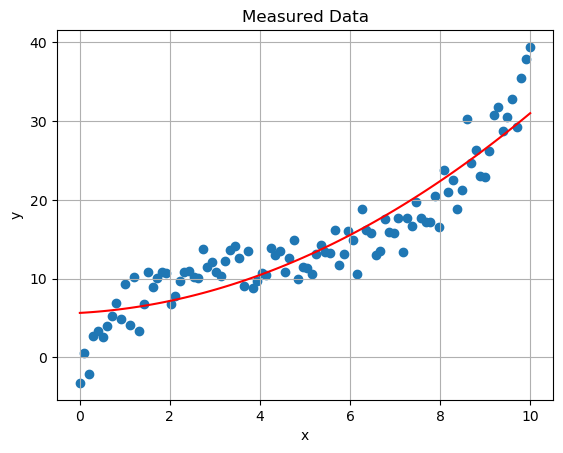

In [40]:
# generate randomized data for testing
import random
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(55)
x_data = np.linspace(0, 10, 100)
y_data = (x_data)*(x_data-4)*(x_data-9)/8+3*x_data + np.random.normal(0, 2, size=x_data.shape) 
# plot the data
plt.scatter(x_data, y_data)
plt.title('Measured Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
# save to file
np.savetxt('measured.txt', np.column_stack((x_data, y_data)))

# Hledana, neznama funke
def model(x, params):
    a, b, c, d = params
    #return a * np.exp(-b * x) + c
    #return a * x**3 + b * x**2 + c*x +d
    return a*x*x +b *x +c

# Definice rezidua (chyby mezi pozorovanymi a predpovedenymi hodnotami)
def residuals(params, x, y):
    return y - model(x, params)

# Pocatecni odhad parametru
pocatecniOdhad = [1.0, 1.0, 1.0, 1.0]

# Provedeni optimalizace metodou nejmensich ctvercu
result = least_squares(residuals, pocatecniOdhad, args=(x_data, y_data))

# Extrakce optimalizovanych parametru
optimized_params = result.x
plt.plot(x_data, model(x_data, optimized_params), label="Fitovana funkce", color="red")
plt.show()
